### Introduction

In this notebook, we aim to demonstrate the concepts of underfitting, appropriate fitting, and overfitting in the context of linear regression models. These concepts are crucial in understanding how different models perform on a given dataset, particularly in relation to the model's complexity and the data's inherent patterns. We will use a synthetic dataset generated from a quadratic relationship with added noise to illustrate these three scenarios:

1. **Underfitting**: A model that is too simple to capture the underlying pattern in the data.
2. **Appropriate Fitting**: A model that correctly captures the pattern without introducing unnecessary complexity.
3. **Overfitting**: A model that is too complex, capturing not only the underlying pattern but also the noise in the data.


In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

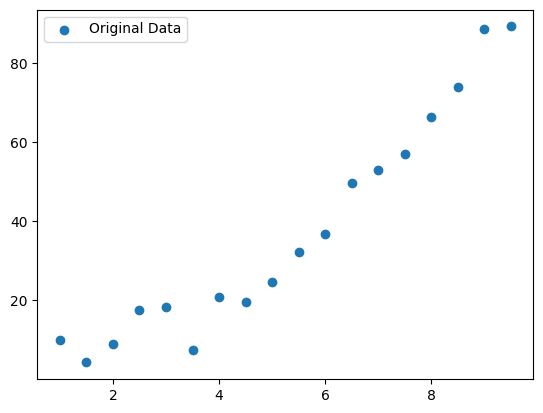

In [2]:
# Generate data
np.random.seed(0)
X = np.arange(1, 10, 0.5).reshape(-1, 1)
y = X**2 + np.random.randn(*X.shape) * 5  # Quadratic relationship with noise
plt.scatter(X, y, label='Original Data')
plt.legend()
plt.show()

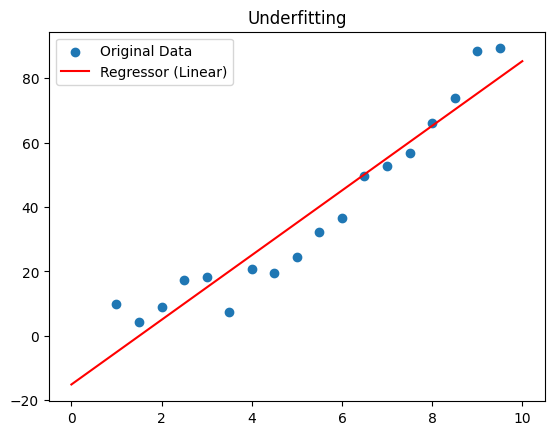

In [3]:
# Underfitting (linear model)
plt.scatter(X, y, label='Original Data')

model = LinearRegression()
model.fit(X, y)
X_pred = np.linspace(0, 10, 100).reshape(-1, 1)
y_pred = model.predict(X_pred)
plt.plot(X_pred, y_pred, label='Regressor (Linear)', color='r')
plt.title("Underfitting")
plt.legend()
plt.show()

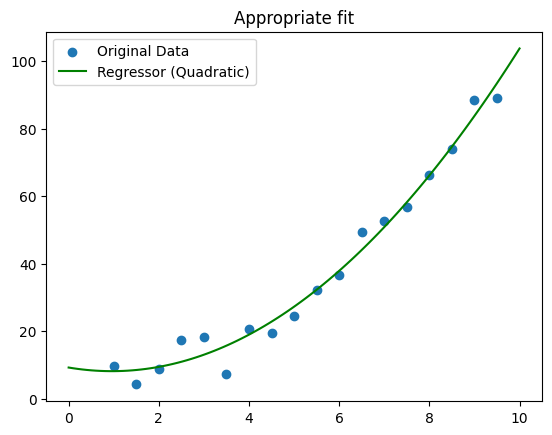

In [4]:
# Appropriate fitting (quadratic model)
poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(X)

plt.scatter(X, y, label='Original Data')

model.fit(X_poly, y)
X_pred_poly = poly_features.transform(X_pred)
y_pred_poly = model.predict(X_pred_poly)
plt.plot(X_pred, y_pred_poly, label='Regressor (Quadratic)', color='g')
plt.title("Appropriate fit")
plt.legend()
plt.show()

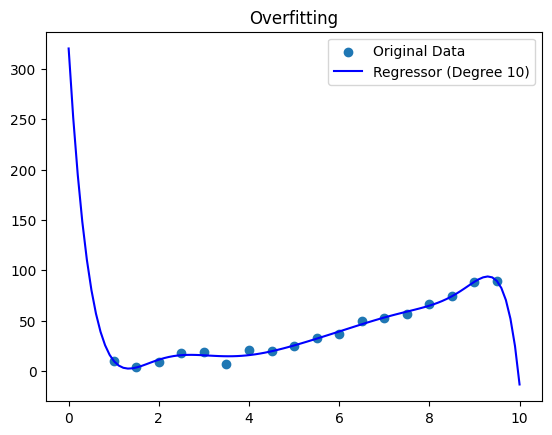

In [5]:
# Overfitting (higher-degree polynomial model)
poly_features_high = PolynomialFeatures(degree=10)

plt.scatter(X, y, label='Original Data')

X_poly_high = poly_features_high.fit_transform(X)
model.fit(X_poly_high, y)
X_pred_poly_high = poly_features_high.transform(X_pred)
y_pred_poly_high = model.predict(X_pred_poly_high)
plt.plot(X_pred, y_pred_poly_high, label='Regressor (Degree 10)', color='b')
plt.title("Overfitting")
plt.legend()
plt.show()

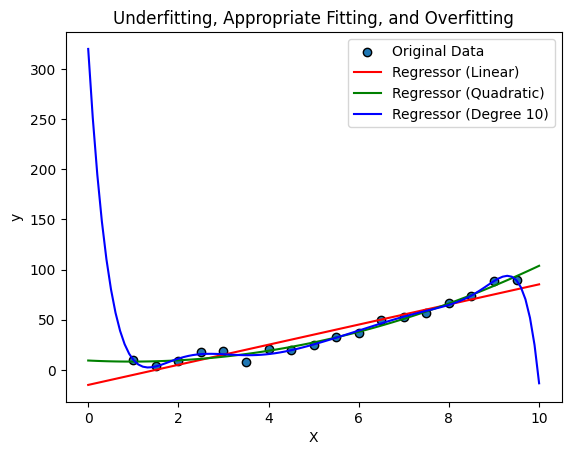

In [6]:
plt.scatter(X, y, label='Original Data',edgecolor='k')

model = LinearRegression()
model.fit(X, y)
X_pred = np.linspace(0, 10, 100).reshape(-1, 1)
y_pred = model.predict(X_pred)
plt.plot(X_pred, y_pred, label='Regressor (Linear)', color='r')

# Appropriate fitting (quadratic model)
poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(X)
model.fit(X_poly, y)
X_pred_poly = poly_features.transform(X_pred)
y_pred_poly = model.predict(X_pred_poly)
plt.plot(X_pred, y_pred_poly, label='Regressor (Quadratic)', color='g')

# Overfitting (higher-degree polynomial model)
poly_features_high = PolynomialFeatures(degree=10)
X_poly_high = poly_features_high.fit_transform(X)
model.fit(X_poly_high, y)
X_pred_poly_high = poly_features_high.transform(X_pred)
y_pred_poly_high = model.predict(X_pred_poly_high)
plt.plot(X_pred, y_pred_poly_high, label='Regressor (Degree 10)', color='b')

# Customize plot
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.title('Underfitting, Appropriate Fitting, and Overfitting')
plt.show()


In [7]:
from sklearn.metrics import mean_squared_error, r2_score
# Calculate metrics for comparison
model.fit(X,y)
y_pred=model.predict(X)
mse_linear = mean_squared_error(y, y_pred)
r2_linear = r2_score(y, y_pred)


poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(X)

model.fit(X_poly, y)
y_pred_poly=model.predict(X_poly)
mse_poly = mean_squared_error(y, y_pred_poly)
r2_poly = r2_score(y, y_pred_poly)



poly_features = PolynomialFeatures(degree=10)
X_poly = poly_features.fit_transform(X)

model.fit(X_poly, y)
y_pred_poly_high=model.predict(X_poly)

mse_poly_high = mean_squared_error(y, y_pred_poly_high)
r2_poly_high = r2_score(y, y_pred_poly_high)

print("Metrics for the models:\n")
print( f'\tLinear MSE: {mse_linear:.2f}\n\tLinear R2: {r2_linear:.2f}\n')
print( f'\tPolynomial (degree 2) MSE: {mse_poly:.2f}\n\tPolynomial (degree 2) R2: {r2_poly:.2f}\n')
print( f'\tPolynomial (degree 10) MSE: {mse_poly_high:.2f}\n\tPolynomial (degree 10) R2: {r2_poly_high:.2f}\n')

Metrics for the models:

	Linear MSE: 63.56
	Linear R2: 0.91

	Polynomial (degree 2) MSE: 14.48
	Polynomial (degree 2) R2: 0.98

	Polynomial (degree 10) MSE: 6.54
	Polynomial (degree 10) R2: 0.99



### Conclusion

In this notebook, we explored the effects of model complexity on regression performance through examples of underfitting, appropriate fitting, and overfitting. By fitting a linear model, a quadratic model, and a high-degree polynomial model to a quadratic dataset, we observed the following:

- **Underfitting**: The linear model failed to capture the quadratic relationship, resulting in poor performance and a misrepresentation of the data trend.
- **Appropriate Fitting**: The quadratic model successfully captured the true underlying relationship, providing a good fit that generalizes well to new data points.
- **Overfitting**: The 10th-degree polynomial model fit the noise in addition to the data trend, resulting in a complex model that does not generalize well and is sensitive to small fluctuations in the data.

These demonstrations highlight the importance of selecting an appropriately complex model for a given dataset to achieve a balance between bias and variance, ultimately leading to better generalization and predictive performance.